In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df= pd.read_csv('synthetic_insurance_data.csv')
df

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1,Single,0,1-5 years,50,0,Low,0,Full Coverage,...,6,1,4,3,2,9,783,-50,Urban,100
9996,18,0,Married,86,1-5 years,50,0,Medium,0,Full Coverage,...,3,1,6,1,3,6,667,50,Urban,100
9997,29,0,Married,86,<1 year,100,0,Low,0,Full Coverage,...,29,1,3,4,3,3,637,50,Urban,100
9998,47,0,Single,0,<1 year,100,0,Medium,0,Liability-Only,...,8,1,2,4,1,13,676,50,Suburban,50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [6]:
df.describe()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,...,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,39.991700,0.159300,42.131400,47.625000,0.497200,36.780000,-79.860000,2219.571400,0.199900,0.305100,...,30.110000,15.478000,0.576700,5.022900,1.996900,1.996900,46.07320,714.253400,-11.320000,64.325000
std,14.050358,0.365974,42.993376,34.354438,0.716131,65.910288,97.955806,148.521132,0.399945,0.460473,...,33.689782,8.677975,0.494107,2.238231,1.415588,0.817409,45.44845,49.749487,48.704156,39.232618
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,1800.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,530.000000,-50.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,2100.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,3.000000,1.000000,1.000000,6.00000,681.000000,-50.000000,50.000000
50%,39.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,2236.000000,0.000000,0.000000,...,50.000000,16.000000,1.000000,5.000000,2.000000,2.000000,12.00000,715.000000,-50.000000,50.000000
75%,50.000000,0.000000,86.000000,50.000000,1.000000,50.000000,0.000000,2336.000000,0.000000,1.000000,...,50.000000,23.000000,1.000000,6.000000,3.000000,3.000000,99.00000,748.000000,50.000000,100.000000
max,90.000000,1.000000,86.000000,100.000000,5.000000,800.000000,0.000000,2936.000000,1.000000,1.000000,...,150.000000,30.000000,1.000000,16.000000,9.000000,3.000000,99.00000,850.000000,50.000000,100.000000


In [7]:
df.isnull().sum()

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


In [8]:
df.shape

(10000, 27)

##  VISUALISATION

In [9]:

Policy_Type_class= df["Source_of_Lead"].value_counts() 
Policy_Type_class

Source_of_Lead
Online      6035
Agent       3004
Referral     961
Name: count, dtype: int64

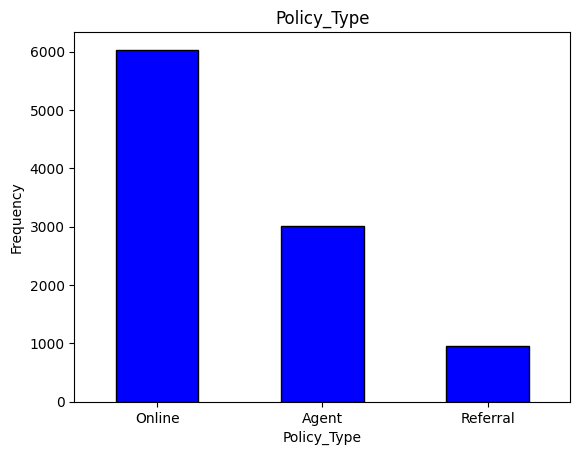

In [10]:
# BAR CHART
Policy_Type_class.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Policy_Type')

plt.xlabel('Policy_Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

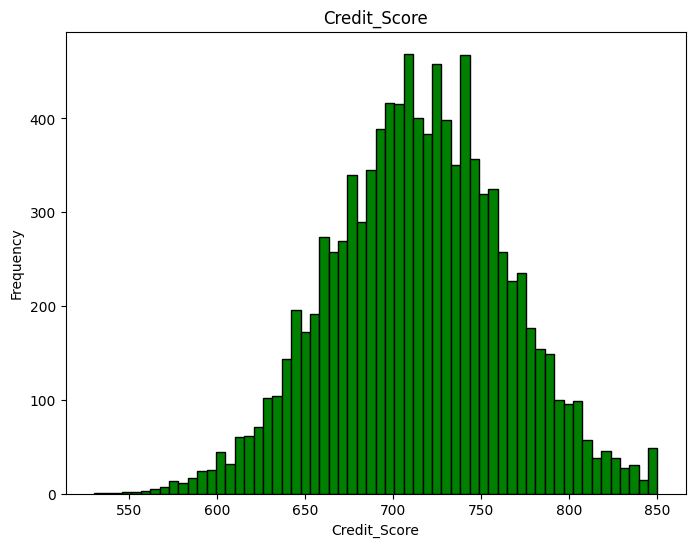

In [11]:
# Histogram

plt.figure(figsize=(8,6))
plt.hist(df['Credit_Score'], bins= 60, color='green', edgecolor='black')
plt.title('Credit_Score')
plt.xlabel('Credit_Score')
plt.ylabel('Frequency')
plt.show()

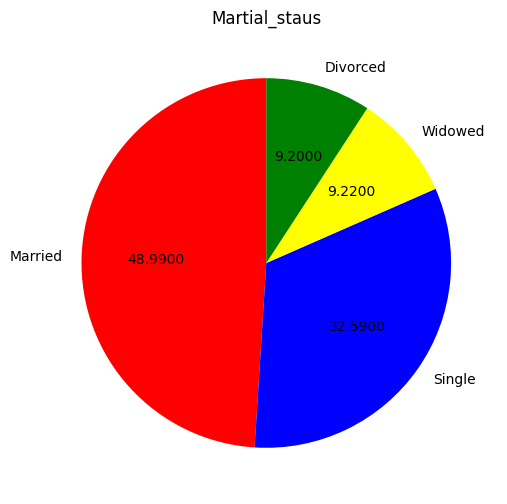

In [12]:
# pie chart

Martial_status= df['Marital_Status'].value_counts()
name=['Married','Single','Widowed','Divorced']
plt.figure(figsize=(8,6))
plt.pie(Martial_status, labels=name, autopct='%0.4f', startangle=90, colors=['red','blue','yellow','green'])
plt.title('Martial_staus')
plt.show()



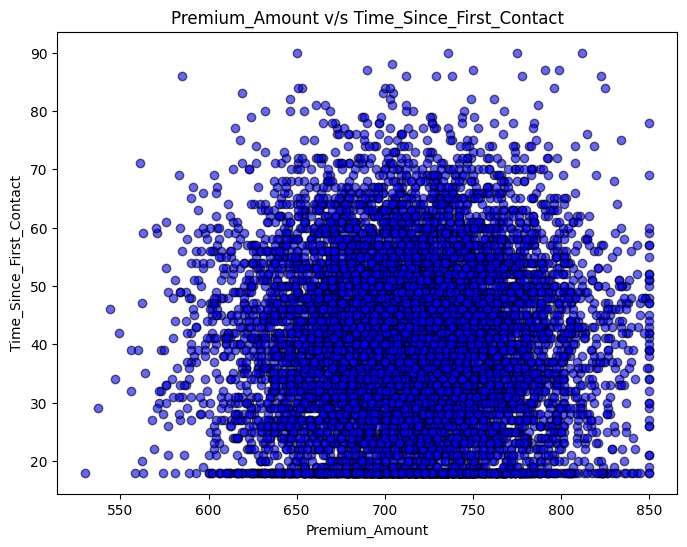

In [13]:
# Scatter plot

plt.figure(figsize=(8,6))

plt.scatter(df['Credit_Score'],df['Age'], alpha=0.6, c='blue', edgecolor='black')  # alpha is the opacity

plt.title('Premium_Amount v/s Time_Since_First_Contact')
plt.xlabel('Premium_Amount')
plt.ylabel('Time_Since_First_Contact')
plt.show()

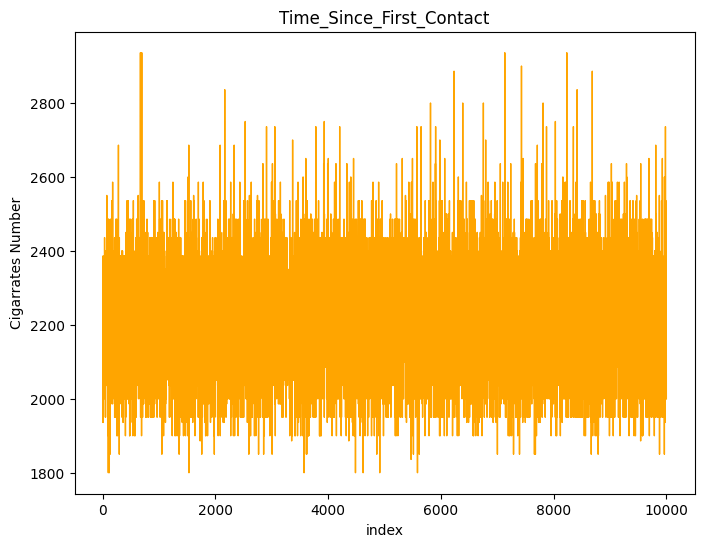

In [14]:
# Line chart


plt.figure(figsize=(8,6))
plt.plot(df.index, df['Premium_Amount'], color='orange', lw=1)

plt.title('Time_Since_First_Contact')
plt.xlabel('index')
plt.ylabel('Cigarrates Number')
plt.show()

<Figure size 2000x1000 with 0 Axes>

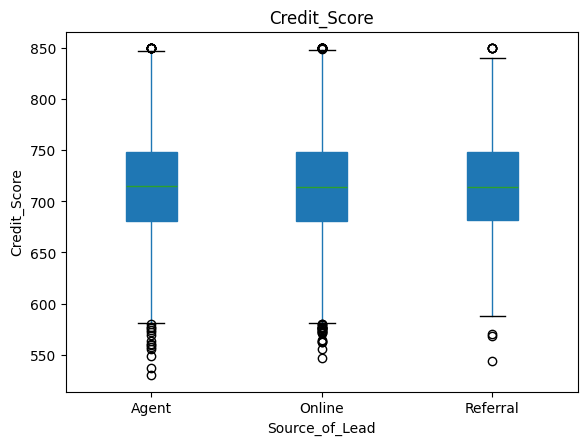

In [15]:
# Box Plot

plt.figure(figsize=(20,10))
df.boxplot(column='Credit_Score', by= 'Source_of_Lead', grid=False, patch_artist=True)

plt.suptitle('')
plt.xlabel('Source_of_Lead')
plt.ylabel('Credit_Score')
plt.show()

In [16]:
Policy_Type_class= df["Policy_Type"].value_counts() #Claims_Severity, 
Policy_Type_class

Policy_Type
Full Coverage     6007
Liability-Only    3993
Name: count, dtype: int64

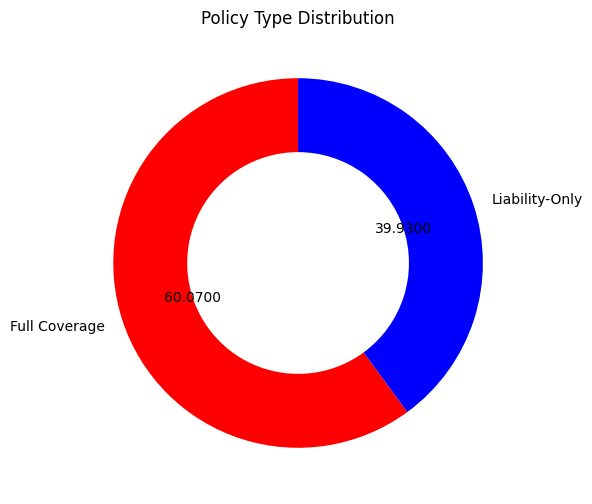

In [17]:
# Donut Chart

survival_counts= df['Policy_Type'].value_counts()

name=['Full Coverage','Liability-Only']

plt.figure(figsize=(8,6))


plt.pie(survival_counts, labels=name, autopct='%0.4f', startangle=90, colors=['red','blue'], wedgeprops=dict(width=0.4))
plt.title('Policy Type Distribution')

plt.show()

## Model Training

In [18]:
data = ['Age', 'Is_Senior', 'Credit_Score', 'Prior_Insurance', 'Claims_Frequency', 'Policy_Type', 'Premium_Amount', 'Total_Discounts', 'Source_of_Lead', 'Website_Visits', 'Inquiries', 'Quotes_Requested', 'Time_Since_First_Contact']
encoder = LabelEncoder()

df['Prior_Insurance'] = encoder.fit_transform(df['Prior_Insurance'])
df["Policy_Type"] = encoder.fit_transform(df['Policy_Type'])
df["Source_of_Lead"] = encoder.fit_transform(df['Source_of_Lead'])

In [19]:
df[data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       10000 non-null  int64
 1   Is_Senior                 10000 non-null  int64
 2   Credit_Score              10000 non-null  int64
 3   Prior_Insurance           10000 non-null  int32
 4   Claims_Frequency          10000 non-null  int64
 5   Policy_Type               10000 non-null  int32
 6   Premium_Amount            10000 non-null  int64
 7   Total_Discounts           10000 non-null  int64
 8   Source_of_Lead            10000 non-null  int32
 9   Website_Visits            10000 non-null  int64
 10  Inquiries                 10000 non-null  int64
 11  Quotes_Requested          10000 non-null  int64
 12  Time_Since_First_Contact  10000 non-null  int64
dtypes: int32(3), int64(10)
memory usage: 898.6 KB


In [20]:
X = df[data]
y = df['Conversion_Status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Model

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.57
Confusion Matrix:
[[   0  860]
 [   0 1140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       860
           1       0.57      1.00      0.73      1140

    accuracy                           0.57      2000
   macro avg       0.28      0.50      0.36      2000
weighted avg       0.32      0.57      0.41      2000



D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Non Linear Model

In [25]:
model1 = SVC(kernel='poly')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [26]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred1)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.5695
Confusion Matrix:
[[  37  823]
 [  38 1102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.04      0.08       860
           1       0.57      0.97      0.72      1140

    accuracy                           0.57      2000
   macro avg       0.53      0.50      0.40      2000
weighted avg       0.54      0.57      0.44      2000



## Logistic regression

In [43]:
model= LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

/Users/raj/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.5665
Confusion Matrix:
[[  11  849]
 [  18 1122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.01      0.02       860
           1       0.57      0.98      0.72      1140

    accuracy                           0.57      2000
   macro avg       0.47      0.50      0.37      2000
weighted avg       0.49      0.57      0.42      2000



## KNN

In [45]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [46]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.5205
Confusion Matrix:
[[346 514]
 [445 695]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.40      0.42       860
           1       0.57      0.61      0.59      1140

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.52      0.52      0.52      2000



## Decision Tree

In [47]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [48]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.506
Confusion Matrix:
[[366 494]
 [494 646]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43       860
           1       0.57      0.57      0.57      1140

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.51      0.51      0.51      2000



In [49]:
from sklearn.ensemble import BaggingClassifier,  AdaBoostClassifier

## Ensemble classification

In [50]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

In [51]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [52]:
ada_pred = ada.predict(X_test)
ada_correct = sum(ada_pred == y_test)
ada_accuracy = ada_correct / len(y_test)

In [53]:
print(f'ada accuracy:\n{ada_accuracy}')

ada accuracy:
0.57


In [54]:
from sklearn.ensemble import RandomForestClassifier

## Radom Forest Classifier

In [55]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)

In [56]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [57]:
y_pred = clf.predict(X_test)

In [59]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.55
Confusion Matrix:
[[269 591]
 [309 831]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.31      0.37       860
           1       0.58      0.73      0.65      1140

    accuracy                           0.55      2000
   macro avg       0.52      0.52      0.51      2000
weighted avg       0.53      0.55      0.53      2000

